In [3]:
import numpy as np
import random as rand
import random
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors
from dataclasses import dataclass
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Constants

B $\rightarrow$ rate of biomass decay \
SIZE $\rightarrow$ dimension of environment \
TIME $\rightarrow$ Number of time steps to simulate 
K -> L(B) const
J -> L(B) const

In [6]:
B = 0.05
J = 0.5
K = 0.3

## Cell Information

Biomass $\textit{biomass: float} \rightarrow$ The amount of biomass at a particular cell \
Burn Status $\textit{on_fire: bool} \rightarrow$ Whether or not a particular cell is burning

In [ ]:
@dataclass
class Cell:
    """Class for keeping track of an information in a cell."""
    curr_biomass: float
    max_biomass: float
    on_fire: bool
        
    def __init__(self, curr_biomass=0.0, max_biomass=1.0, on_fire=False):
        self.curr_biomass = curr_biomass
        self.max_biomass = max_biomass
        self.on_fire = on_fire
    
    def calculate_distribution(self):
        """
        Calculates the probability distribution for fire spread to neighboring cells based on current cell parameters.
        """
        pass
    
    def set_fire(self):
        self.on_fire = True
        
    def n_t(self):
        pass
    
    def l_b(self):
        return (self.curr_biomass / self.max_biomass) * J + K

class Normal(Cell):
    """Normal cell class"""
    def n_t(self):
        return random.choices(population=[0, 1, 2], weights=[0.85, 0.13, 0.02])

class HRB(Cell):
    """HRB cell class""" 
    def n_t(self):
        return random.choices(population=[0, 1, 2], weights=[0.9, 0.09, 0.01])
    
class Log(Cell):
    """Logged cell class"""
    def calculate_distribution(self):
        return random.choices(population=[0, 1, 2], weights=[0.5, 0.35, 0.15])

In [21]:
TYPES = [HRB, Normal, Log]
    
class Env:
    """Environment class"""
    size: int
    max_time: int
        
    def __init__(self, size: int, max_time=100):
        self.size = size
        self.map = np.array([[random.choice(TYPES)(0.0, bool(random.getrandbits(1))) for _ in range(self.size)] \
                             for _ in range(self.size)], dtype=object)
        #locations of currently burning cells
        self.curr_burn = [(i, j) for i in range(self.size) \
                              for j in range(self.size) if self.map[i, j].on_fire is True] 
    
    def simulate(self):
        while t < self.max_time:
            curr_add_burn = set() # keep current burned during a single tick in a set so no instantaneous burn
            #look at what's burning already since only those cells can change state
            for (i, j) in self.curr_burn:
                #check the adjacent cells to see if they're on fire and set fire
                #LOCAL SPREAD
                if not self.map[i - 1, j].on_fire and (i - 1 >= 0): #left
                    set_fire_prob = self.map[i, j].l_b / 4.0
                    if random.random() < set_fire_prob:
                        curr_add_burn.add((i - 1, j))
                if not self.map[i, j - 1].on_fire and (j - 1 >= 0): #top
                    set_fire_prob = self.map[i, j].l_b / 4.0
                    if random.random() < set_fire_prob:
                        curr_add_burn.add((i, j - 1))
                if not self.map[i + 1, j].on_fire and (j - 1 < self.size): #right
                    set_fire_prob = self.map[i, j].l_b / 4.0
                    if random.random() < set_fire_prob:
                        curr_add_burn.add((i + 1, j))     
                if not self.map[i, j + 1].on_fire and (j - 1 < self.size): #bottom
                    set_fire_prob = self.map[i, j].l_b / 4.0
                    if random.random() < set_fire_prob:
                        curr_add_burn.add((i, j + 1))
                #NONLOCAL SPREAD
                num_nonlocal = self.map[i, j].n_t()
                
            for (i, j) in curr_add_burn:
                self.map[i, j].set_fire()
            t += 1
    
    def populate_state(self, plot_type="terrain"):
        ret = np.array([[0 for _ in range(self.size)] for _ in range(self.size)])
        if plot_type == "burn":
            for i in range(self.size):
                for j in range(self.size):
                    if self.map[i, j].set_fire:
                        ret[i, j] = 0
                    else:
                        ret[i, j] = 1
        else:
            for i in range(self.size):
                for j in range(self.size):
                    if isinstance(self.map[i, j], Normal):
                        ret[i, j] = 0
                    elif isinstance(self.map[i, j], HRB):
                        ret[i, j] = 1
                    elif isinstance(self.map[i, j], Log):
                        ret[i, j] = 2
        return ret
    
    def plot_simulations(self, t=0, plot_type="terrain"):
        # create discrete colormap
        curr_state = self.populate_state()
        terrain_colors = colors.ListedColormap(['#24422c', '#4a8a5b', '#aab560'])
        if plot_type == "burn":
            curr_state = self.populate_state("burn")
            terrain_colors = colors.ListedColormap(['#000000', '#4a8a5b'])
        fig, ax = plt.subplots()
        ax.imshow(curr_state, cmap=terrain_colors)
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
        plt.axis('off')
        plt.figtext(0.5, 0.01, "Land map at time t = " + str(t), wrap=True, horizontalalignment='center', fontsize=10)
        plt.show()

In [22]:
test = Env(100)
test.map

array([[HRB(curr_biomass=0.0, max_biomass=True, on_fire=False),
        HRB(curr_biomass=0.0, max_biomass=True, on_fire=False),
        Normal(curr_biomass=0.0, max_biomass=True, on_fire=False), ...,
        Log(curr_biomass=0.0, max_biomass=True, on_fire=False),
        HRB(curr_biomass=0.0, max_biomass=False, on_fire=False),
        HRB(curr_biomass=0.0, max_biomass=True, on_fire=False)],
       [Log(curr_biomass=0.0, max_biomass=True, on_fire=False),
        HRB(curr_biomass=0.0, max_biomass=False, on_fire=False),
        Normal(curr_biomass=0.0, max_biomass=False, on_fire=False), ...,
        Normal(curr_biomass=0.0, max_biomass=False, on_fire=False),
        HRB(curr_biomass=0.0, max_biomass=False, on_fire=False),
        Normal(curr_biomass=0.0, max_biomass=True, on_fire=False)],
       [Normal(curr_biomass=0.0, max_biomass=True, on_fire=False),
        Normal(curr_biomass=0.0, max_biomass=True, on_fire=False),
        Normal(curr_biomass=0.0, max_biomass=False, on_fire=False), .

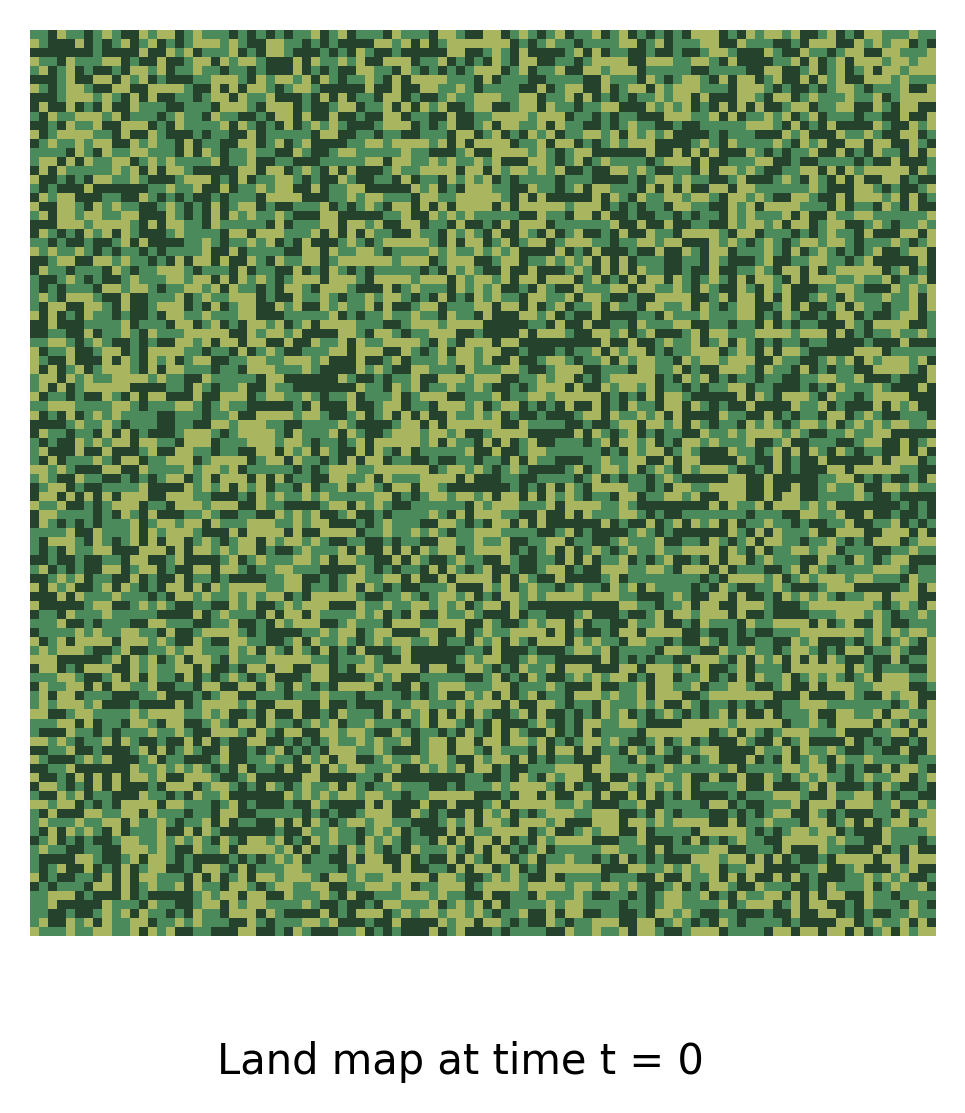

In [23]:
test.populate_state()
test.plot_simulations()